[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NFLX)  2264 non-null   float64
 1   (Close, NFLX)      2264 non-null   float64
 2   (High, NFLX)       2264 non-null   float64
 3   (Low, NFLX)        2264 non-null   float64
 4   (Open, NFLX)       2264 non-null   float64
 5   (Volume, NFLX)     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB


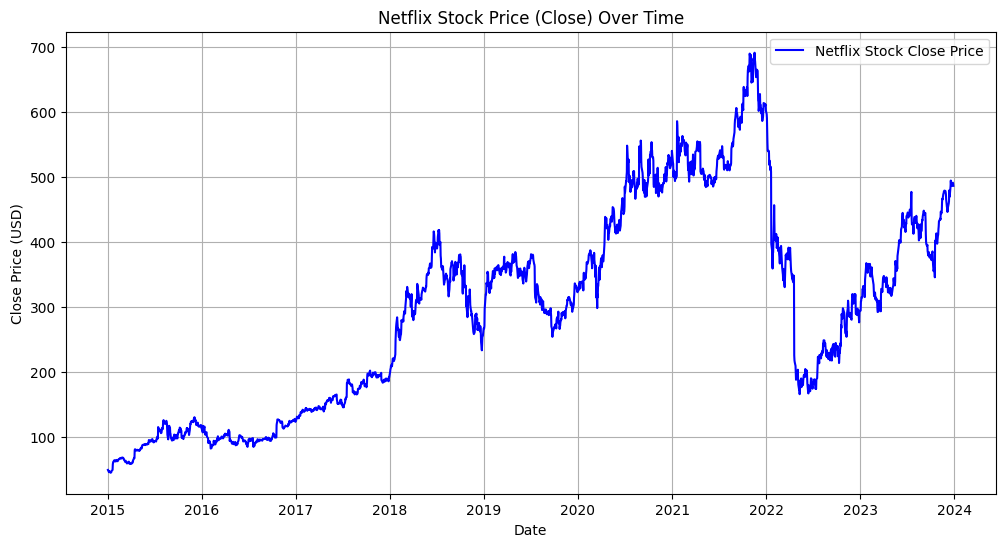

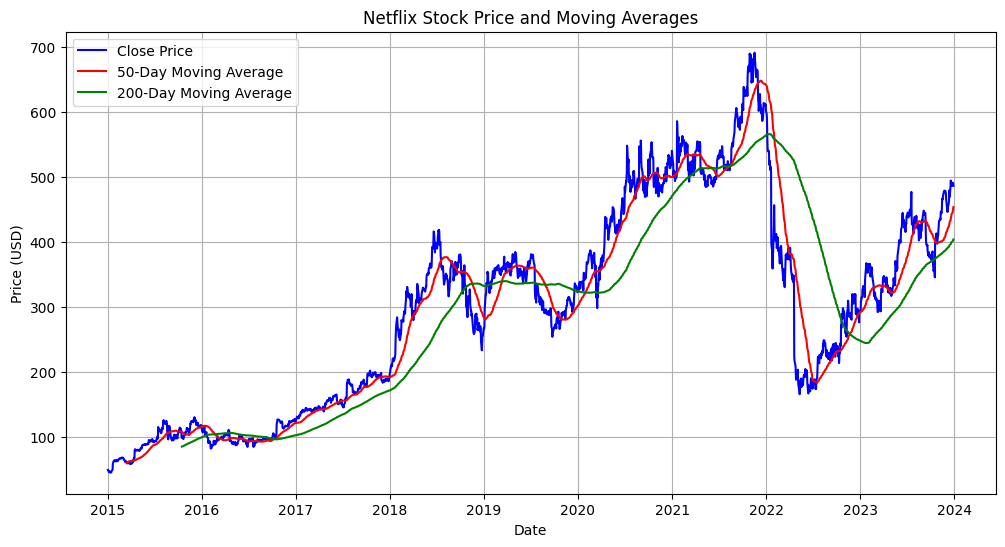

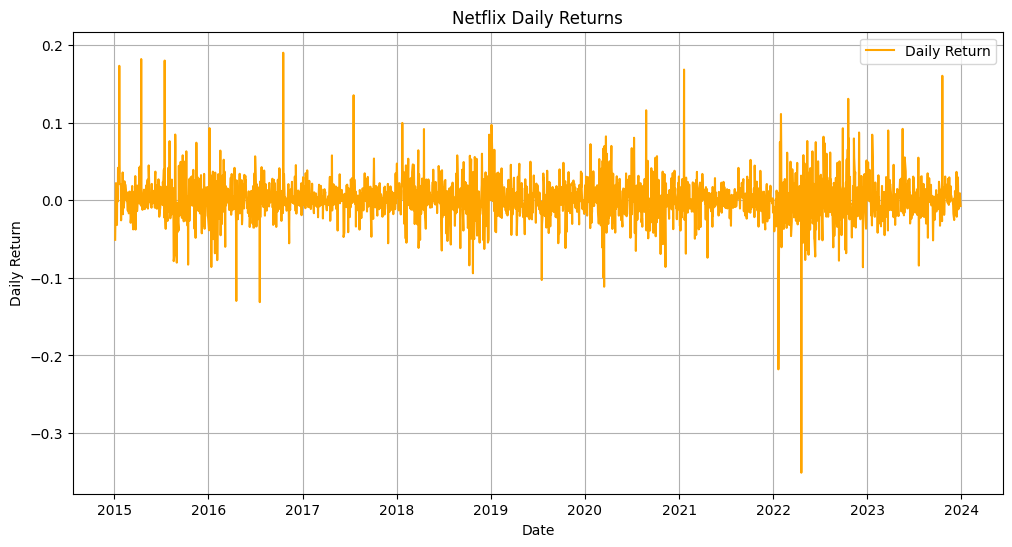

ValueError: Data must be 1-dimensional, got ndarray of shape (2264, 1) instead

<Figure size 1200x600 with 0 Axes>

In [4]:
# Step 1: Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Fetch historical stock data for Netflix (NFLX)
ticker = 'NFLX'
stock_data = yf.download(ticker, start='2015-01-01', end='2024-01-01')

# Display the first few rows of the stock data
stock_data.head()

# Step 3: Basic Data Exploration
# Get general information about the stock data
stock_data.info()

# Check for missing values
stock_data.isnull().sum()

# Get the descriptive statistics of the stock data
stock_data.describe()

# Step 4: Plot the 'Close' price of Netflix stock over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Netflix Stock Close Price', color='blue')
plt.title('Netflix Stock Price (Close) Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Calculate Moving Averages (50-day and 200-day)
stock_data['50_day_ma'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_day_ma'] = stock_data['Close'].rolling(window=200).mean()

# Plot the closing price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['50_day_ma'], label='50-Day Moving Average', color='red')
plt.plot(stock_data['200_day_ma'], label='200-Day Moving Average', color='green')
plt.title('Netflix Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Calculate and Plot Daily Returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Daily_Return'], label='Daily Return', color='orange')
plt.title('Netflix Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Visualize Stock Volume vs Daily Returns
plt.figure(figsize=(12, 6))
sns.scatterplot(x=stock_data['Volume'], y=stock_data['Daily_Return'], alpha=0.5)
plt.title('Netflix Stock Volume vs Daily Returns')
plt.xlabel('Volume')
plt.ylabel('Daily Return')
plt.show()

# Step 8: Correlation Matrix of Stock Data
corr_matrix = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Netflix Stock Data')
plt.show()

# Step 9: Additional Analysis (Optional)
# Calculate volatility (Standard Deviation of Daily Returns)
volatility = stock_data['Daily_Return'].std()
print(f"Volatility (Standard Deviation of Daily Returns): {volatility}")

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Daily_Return'].rolling(window=21).std(), label='21-Day Volatility', color='purple')
plt.title('Netflix 21-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Saving the Data to a CSV File (Optional)
# Save the stock data with all the calculated features to a CSV file
stock_data.to_csv('netflix_stock_analysis.csv')

print("Analysis complete. Data saved as 'netflix_stock_analysis.csv'.")
